# Model predicts that clients are churned or not

# Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,root_mean_squared_error,r2_score
from tabulate import tabulate
import joblib
import plotly.express as px
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data information


In [2]:
df=pd.read_csv('/Users/abduroshyd/Downloads/ecommerce_customer_churn_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [4]:
# Ushbu datasetda model `Churned` ni bashorat qiladi
#
# Churned — target o‘zgaruvchi:
# 0 — mijoz platformada qolgan (active customer)
# 1 — mijoz platformani tark etgan (churn)
#
# Model quyidagi feature’lar asosida qaror chiqaradi:
#
# 1) Demografik ma’lumotlar:
#    - Age                    → mijozning yoshi
#    - Gender                 → mijoz jinsi
#    - Country                → mijoz yashayotgan davlat
#    - City                   → mijoz yashayotgan shahar
#
# 2) Account / Membership ma’lumotlari:
#    - Membership_Years       → platformada a’zo bo‘lib turgan yillar soni
#    - Signup_Quarter         → ro‘yxatdan o‘tilgan chorak (Q1–Q4)
#
# 3) Foydalanish faolligi (Usage & Behavior):
#    - Login_Frequency        → tizimga kirishlar chastotasi
#    - Session_Duration_Avg   → o‘rtacha sessiya davomiyligi
#    - Pages_Per_Session      → bitta sessiyada ko‘rilgan sahifalar soni
#    - Mobile_App_Usage       → mobil ilovadan foydalanish darajasi
#    - Social_Media_Engagement_Score → ijtimoiy tarmoq faolligi balli
#
# 4) Xarid va savdo xulqi:
#    - Total_Purchases        → jami amalga oshirilgan xaridlar soni
#    - Average_Order_Value    → o‘rtacha buyurtma qiymati
#    - Lifetime_Value         → mijozning umumiy keltirgan daromadi (LTV)
#    - Days_Since_Last_Purchase → oxirgi xariddan beri o‘tgan kunlar
#    - Wishlist_Items         → wishlist’ga qo‘shilgan mahsulotlar soni
#    - Cart_Abandonment_Rate  → savatchani tashlab ketish darajasi (%)
#
# 5) Chegirma va moliyaviy xulq:
#    - Discount_Usage_Rate    → chegirmalardan foydalanish darajasi (%)
#    - Credit_Balance         → hisobdagi kredit / bonus balansi
#
# 6) Qaytarish va mijoz muammolari:
#    - Returns_Rate           → mahsulotlarni qaytarish darajasi (%)
#    - Customer_Service_Calls → mijoz xizmatiga murojaatlar soni
#
# 7) Aloqa va feedback:
#    - Email_Open_Rate        → email xabarlarni ochish darajasi (%)
#    - Product_Reviews_Written → yozilgan mahsulot sharhlari soni
#
# 8) To‘lov xulqi:
#    - Payment_Method_Diversity → ishlatilgan to‘lov usullari xilma-xilligi
#
# Modelning asosiy vazifasi:
# "Bu mijoz churn qiladimi yoki yo‘qmi?" degan savolga javob berish


In [5]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [6]:
df.isnull().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

In [7]:
import os
folder="data"
filename="df_row.csv"
os.makedirs(folder,exist_ok=True)
file_path=os.path.join(folder,filename)
df.to_csv(file_path,index=False)

# Train test split

In [8]:
x=df.drop('Churned',axis=1)
y=df['Churned']
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)
# df divided x_test,x_train y_test,y_train

In [9]:
x_train.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Signup_Quarter
33553,33.0,Female,Germany,Hamburg,4.8,5.0,NaN,6.5,62.1,5.0,...,NaN,0.0,5.0,3.0,4.5,10.0,3.0,855.25,NaN,Q2
9427,30.0,Female,UK,London,1.5,18.0,41.3,12.6,31.7,NaN,...,3.1,31.4,3.0,4.0,21.9,30.6,2.0,480.17,2576.0,Q3
199,24.0,Male,USA,Phoenix,5.0,4.0,14.9,5.4,63.3,0.0,...,6.9,8.1,7.0,NaN,23.6,12.9,1.0,2351.35,848.0,Q2
12447,23.0,Male,Canada,Vancouver,0.5,29.0,53.9,12.0,38.7,12.0,...,3.1,45.1,3.0,3.0,79.3,33.6,3.0,3916.60,3174.0,Q2
39489,52.0,Male,Germany,Berlin,3.0,8.0,19.1,5.8,67.4,2.0,...,0.3,0.0,6.0,3.0,12.2,10.4,3.0,684.17,1270.0,Q3


In [10]:
x_test.head()


,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Signup_Quarter
39087,25.0,Female,Canada,Vancouver,3.7,19.0,49.1,17.1,20.7,8.0,...,11.6,52.1,2.0,1.0,53.3,37.8,3.0,2204.14,3762.0,Q1
30893,33.0,Female,Canada,Ottawa,2.5,16.0,33.7,11.0,55.8,NaN,...,7.7,36.6,6.0,NaN,33.5,29.3,2.0,5301.61,3345.0,Q3
45278,32.0,Female,India,Delhi,2.1,4.0,18.4,1.0,71.8,1.0,...,15.5,0.2,10.0,2.0,8.0,17.2,2.0,552.31,2728.0,Q2
16398,48.0,Male,UK,Glasgow,3.2,20.0,45.5,15.9,41.7,9.0,...,2.0,49.6,3.0,6.0,28.0,29.2,2.0,2789.64,2077.0,Q4
13653,35.0,Male,USA,Phoenix,1.6,10.0,18.7,3.1,78.8,0.0,...,3.7,25.2,6.0,0.0,12.5,26.3,2.0,740.02,NaN,Q1


# Baseline

# Handling missing values

In [11]:
def fillna_mean_mode(x_train, x_test):
    x_train = x_train.copy()
    x_test = x_test.copy()

    for col in x_train.columns:
        if x_train[col].dtype in [ "float64","int64"]:
            fill_value = x_train[col].mean()
        else:
            fill_value = x_train[col].mode()[0]
        x_train[col] = x_train[col].fillna(fill_value)
        x_test[col] = x_test[col].fillna(fill_value)

    return x_train, x_test
# missing values filled with mean  and mode 

In [12]:

x_train_filled, x_test_filled = fillna_mean_mode(x_train, x_test)
# function getting runned

# Encoding 

In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_train(df, threshold=5):
    df = df.copy()
    encoders = {}

    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].nunique() <= threshold:
                # One-hot encoding
                dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
                df = pd.concat([df.drop(columns=col), dummies], axis=1)
            else:
                # Label encoding
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])
                encoders[col] = le

    return df, encoders

In [14]:
def encode_test(df, encoders, train_columns):
    df = df.copy()

    for col, le in encoders.items():
        df[col] = df[col].astype(str)
        encoded = []
        for val in df[col]:
            if val in le.classes_:
                encoded.append(le.transform([val])[0])
            else:
                encoded.append(-1)  
        df[col] = encoded

    df = pd.get_dummies(df)
    df = df.reindex(columns=train_columns, fill_value=0)

    return df
# x_test encoded with onhot and label encoders

# Running encoding

In [15]:

x_train_encoded, encoders = encode_train(x_train_filled)
x_test_encoded = encode_test(x_test_filled, encoders, x_train_encoded.columns)
# encoding function getting runned

In [16]:
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33553 to 5857
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  float64
 1   Country                        10000 non-null  int64  
 2   City                           10000 non-null  int64  
 3   Membership_Years               10000 non-null  float64
 4   Login_Frequency                10000 non-null  float64
 5   Session_Duration_Avg           10000 non-null  float64
 6   Pages_Per_Session              10000 non-null  float64
 7   Cart_Abandonment_Rate          10000 non-null  float64
 8   Wishlist_Items                 10000 non-null  float64
 9   Total_Purchases                10000 non-null  float64
 10  Average_Order_Value            10000 non-null  float64
 11  Days_Since_Last_Purchase       10000 non-null  float64
 12  Discount_Usage_Rate            10000 non-null  f

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33553 to 5857
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            9489 non-null   float64
 1   Gender                         10000 non-null  object 
 2   Country                        10000 non-null  object 
 3   City                           10000 non-null  object 
 4   Membership_Years               10000 non-null  float64
 5   Login_Frequency                10000 non-null  float64
 6   Session_Duration_Avg           9315 non-null   float64
 7   Pages_Per_Session              9397 non-null   float64
 8   Cart_Abandonment_Rate          10000 non-null  float64
 9   Wishlist_Items                 9216 non-null   float64
 10  Total_Purchases                10000 non-null  float64
 11  Average_Order_Value            10000 non-null  float64
 12  Days_Since_Last_Purchase       9427 non-null   f

# Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

def scale_train(df):
    df = df.copy()
    scalers = {}

    for col in df.columns:
        if df[col].dtype != 'object':
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler

    return df, scalers
# scaling for x_train with Minmax scaler

In [19]:
def scale_test(df, scalers):
    df = df.copy()

    for col in df.columns:
        if col in scalers:
            df[col] = scalers[col].transform(df[[col]])

    return df
# scaling for x_test 

# Running scaling

In [20]:
x_train_scaled, scalers = scale_train(x_train_encoded)
x_test_scaled = scale_test(x_test_encoded, scalers)
# scaling function gettting runned

In [21]:
import os
folder="data"
filename="baseline_preprocessed.csv"
os.makedirs(folder,exist_ok=True)
file_path=os.path.join(folder,filename)
df.to_csv(file_path,index=False)

In [22]:
x_train_scaled.head()

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Gender_Female,Gender_Male,Gender_Other,Signup_Quarter_Q1,Signup_Quarter_Q2,Signup_Quarter_Q3,Signup_Quarter_Q4
33553,0.193103,0.428571,0.307692,0.474747,0.113636,0.389872,0.247748,0.432020,0.227273,0.142450,...,0.50,0.095163,0.273126,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9427,0.172414,0.857143,0.435897,0.141414,0.409091,0.589181,0.522523,0.220532,0.194814,0.206553,...,0.25,0.053428,0.357927,1.0,0.0,0.0,0.0,0.0,1.0,0.0
199,0.131034,1.000000,0.846154,0.494949,0.090909,0.203216,0.198198,0.440368,0.000000,0.170940,...,0.00,0.261632,0.117827,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12447,0.124138,0.142857,0.974359,0.040404,0.659091,0.773392,0.495495,0.269230,0.545455,0.263533,...,0.50,0.435796,0.441017,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39489,0.324138,0.428571,0.051282,0.292929,0.181818,0.264620,0.216216,0.468891,0.090909,0.149573,...,0.50,0.076127,0.176462,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
x_test_scaled.head()

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Gender_Female,Gender_Male,Gender_Other,Signup_Quarter_Q1,Signup_Quarter_Q2,Signup_Quarter_Q3,Signup_Quarter_Q4
39087,0.137931,0.142857,0.974359,0.363636,0.431818,0.703216,0.725225,0.144007,0.363636,0.220798,...,0.50,0.245252,0.522718,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30893,0.193103,0.142857,0.769231,0.242424,0.363636,0.478070,0.450450,0.388192,0.194814,0.256410,...,0.25,0.589904,0.464777,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45278,0.186207,0.571429,0.230769,0.202020,0.090909,0.254386,0.000000,0.499501,0.045455,0.142450,...,0.25,0.061455,0.379047,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16398,0.296552,0.857143,0.282051,0.313131,0.454545,0.650585,0.671171,0.290100,0.409091,0.305556,...,0.25,0.310400,0.288592,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13653,0.206897,1.000000,0.846154,0.151515,0.227273,0.258772,0.094595,0.548199,0.000000,0.128205,...,0.25,0.082341,0.273126,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Training

In [24]:
# training Logistic Regression and Random Forest Classifier
lr= LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
lr.fit(x_train_encoded, y_train)
rf.fit(x_train_encoded, y_train)

/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

# Shap value Global

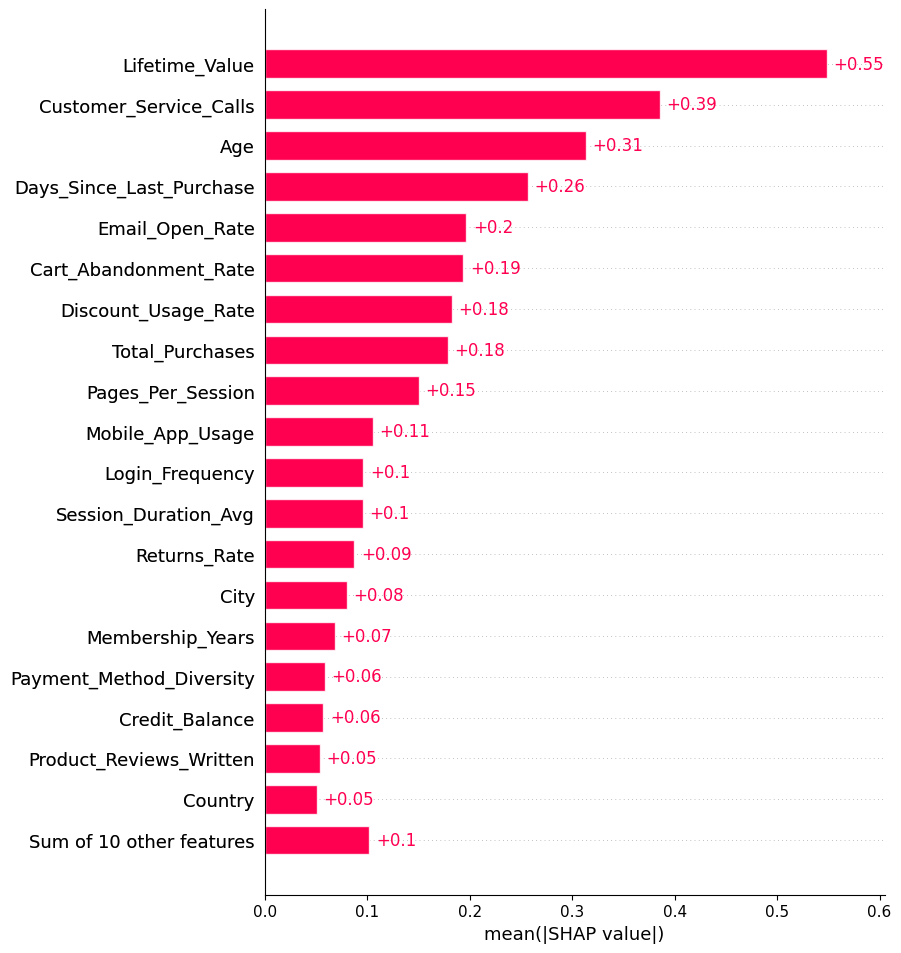

In [25]:
explainer = shap.LinearExplainer(lr, x_train_encoded, feature_names=x_train_encoded.columns.tolist())
# shapmvalue for Linear model
x_sample = x_test_encoded.iloc[:500]
shap_values = explainer(x_sample)
shap.plots.bar(shap_values, max_display=20)
plt.show()
# showing bar with matplotlib

# Shap value Local


Local sample idx: 100 | Predicted goals: 0


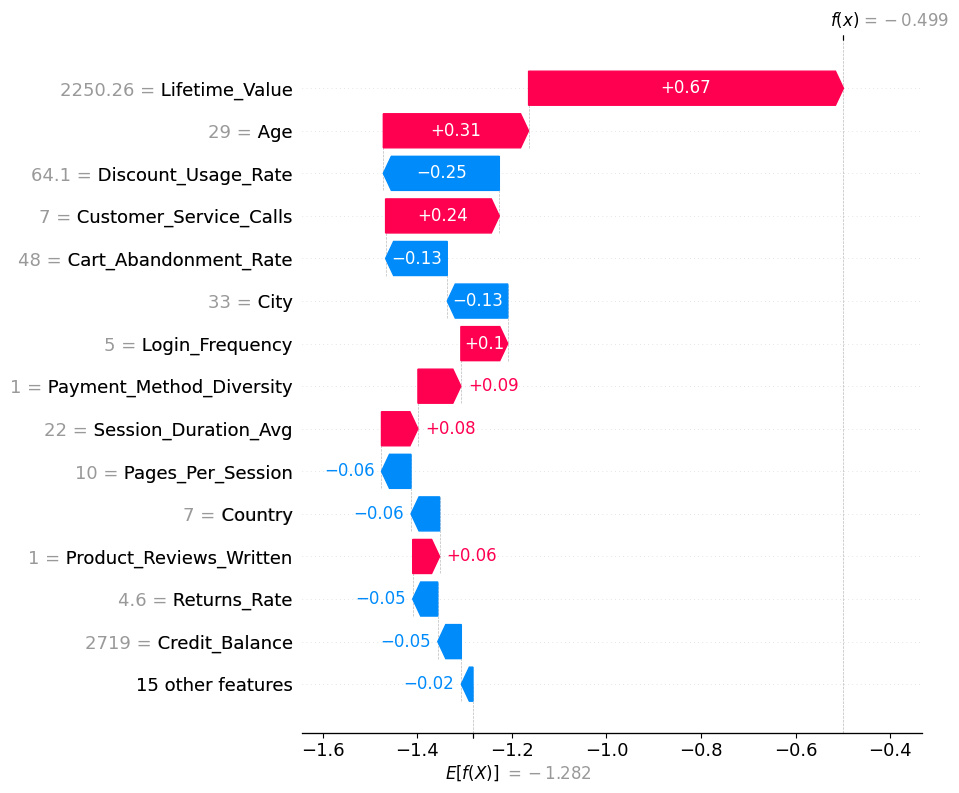

In [26]:
# one sample index
idx = 100
# model prediction 
pred_one = lr.predict(x_sample.iloc[idx:idx+1])[0]
print("\nLocal sample idx:", idx, "| Predicted goals:", pred_one)
# shap waterfall
shap.plots.waterfall(shap_values[idx], max_display=15)
plt.show()

# Training

In [27]:
# training naive bayes and decision tree
nb= GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
nb.fit(x_train_encoded, y_train)
dt.fit(x_train_encoded, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
#traing support vector machine
svm=LinearSVC(C=1.0)
svm.fit(x_train_encoded, y_train)

LinearSVC()

In [29]:
import os
folder="data"
filename="baseline_trained.csv"
os.makedirs(folder,exist_ok=True)
file_path=os.path.join(folder,filename)
df.to_csv(file_path,index=False)

# Evaluating

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred_log = lr.predict(x_test_encoded)
y_pred_tree = rf.predict(x_test_encoded)

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("ROC AUC  :", roc_auc_score(y_test, lr.predict_proba(x_test_encoded)[:,1]))

# Evaluate Random Forest
print("RandomForest:")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall   :", recall_score(y_test, y_pred_tree))
print("F1 Score :", f1_score(y_test, y_pred_tree))
print("ROC AUC  :", roc_auc_score(y_test, rf.predict_proba(x_test_encoded)[:,1]))

Logistic Regression:
Accuracy : 0.77215
Precision: 0.6761931980565876
Recall   : 0.4086355785837651
F1 Score : 0.5094197437829691
ROC AUC  : 0.7779017488717839
RandomForest:
Accuracy : 0.909825
Precision: 0.9055030007120334
Recall   : 0.7687392055267703
F1 Score : 0.8315351921909299
ROC AUC  : 0.9215435018030798


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred_log = nb.predict(x_test_encoded)
y_pred_tree = dt.predict(x_test_encoded)

# Evaluate Naivebayes
print("NaiveBayes:")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("ROC AUC  :", roc_auc_score(y_test, lr.predict_proba(x_test_encoded)[:,1]))

# Evaluate desicionTree
print("Decision Tree:")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall   :", recall_score(y_test, y_pred_tree))
print("F1 Score :", f1_score(y_test, y_pred_tree))
print("ROC AUC  :", roc_auc_score(y_test, rf.predict_proba(x_test_encoded)[:,1]))

NaiveBayes:
Accuracy : 0.6765
Precision: 0.4565828119014174
Recall   : 0.6175302245250431
F1 Score : 0.5249981645987813
ROC AUC  : 0.7779017488717839
Decision Tree:
Accuracy : 0.842775
Precision: 0.7228915662650602
Recall   : 0.7409326424870466
F1 Score : 0.7318009296771717
ROC AUC  : 0.9215435018030798


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred_log = nb.predict(x_test_encoded)


# Support Vector Machine
print("SupportVectorMachine:")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("ROC AUC  :", roc_auc_score(y_test, lr.predict_proba(x_test_encoded)[:,1]))


SupportVectorMachine:
Accuracy : 0.6765
Precision: 0.4565828119014174
Recall   : 0.6175302245250431
F1 Score : 0.5249981645987813
ROC AUC  : 0.7779017488717839


# Results

In [33]:
from tabulate import tabulate

# Metrics data (yangilangan natijalar)
data = [
    ["Naive Bayes", 0.6765, 0.4565828119014174, 0.6175302245250431, 0.5249981645987813, 0.7779017488717839],
    ["Decision Tree", 0.842775, 0.7228915662650602, 0.7409326424870466, 0.7318009296771717, 0.9215435018030798],
    ["Logistic Regression", 0.77215, 0.6761931980565876, 0.4086355785837651, 0.5094197437829691, 0.7779017488717839],
    ["Random Forest", 0.909825, 0.9055030007120334, 0.7687392055267703, 0.8315351921909299, 0.9215435018030798],
    ["Support Vector Machine", 0.6765, 0.4565828119014174, 0.6175302245250431, 0.5249981645987813, 0.7779017488717839],
]

# Column headers
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

# Print tabulated table
print(tabulate(data, headers=headers, tablefmt="grid", floatfmt=".3f"))


+------------------------+------------+-------------+----------+------------+-----------+
| Model                  |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
+========================+============+=============+==========+============+===========+
| Naive Bayes            |      0.676 |       0.457 |    0.618 |      0.525 |     0.778 |
+------------------------+------------+-------------+----------+------------+-----------+
| Decision Tree          |      0.843 |       0.723 |    0.741 |      0.732 |     0.922 |
+------------------------+------------+-------------+----------+------------+-----------+
| Logistic Regression    |      0.772 |       0.676 |    0.409 |      0.509 |     0.778 |
+------------------------+------------+-------------+----------+------------+-----------+
| Random Forest          |      0.910 |       0.906 |    0.769 |      0.832 |     0.922 |
+------------------------+------------+-------------+----------+------------+-----------+
| Support 

# Improved 

In [34]:
df=pd.read_csv('/Users/abduroshyd/Downloads/data/df_row.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [36]:
df.isnull().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

# Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

def encodla_train(df, onehot_threshold=5):    
    label_encoders = {}
    onehot_cols = {}

    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].nunique() <= onehot_threshold:
                onehot_cols[col] = df[col].unique()
            else:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])
                label_encoders[col] = le

    df = pd.get_dummies(df, columns=onehot_cols.keys(), drop_first=True)

    return df, label_encoders, onehot_cols

In [38]:
def encodla_test(df, label_encoders, onehot_cols, train_columns):
    

    # Label encoding with unseen handling
    for col, le in label_encoders.items():
        df[col] = df[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )

    # One-hot encoding
    df = pd.get_dummies(df, columns=onehot_cols.keys(), drop_first=True)

    # Align columns
    df = df.reindex(columns=train_columns, fill_value=0)

    return df

In [39]:
x_train, label_encoders, onehot_cols = encodla_train(x_train)

x_test = encodla_test(
    x_test,
    label_encoders,
    onehot_cols,
    train_columns=x_train.columns)

# Handling missing values with KNN

In [40]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_impute_train(x_train, n_neighbors=5):
   
  
    x_train = x_train.copy()
    imputer = KNNImputer(n_neighbors=n_neighbors)
   
    x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
    return x_train_imputed, imputer
# filling missing values with knn

In [41]:
def knn_impute_test(x_test, imputer):
    x_test = x_test.copy()
    x_test_imputed = pd.DataFrame(
        imputer.transform(x_test),
        columns=x_test.columns,
        index=x_test.index
    )
    return x_test_imputed


In [42]:
x_train_knn, knn_imputer = knn_impute_train(x_train, n_neighbors=5)
x_test_knn = knn_impute_test(x_test, knn_imputer)


In [43]:
from sklearn.preprocessing import MinMaxScaler

def scale_train(df):
    df = df.copy()
    scalers = {}

    for col in df.columns:
        if df[col].dtype != 'object':
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler

    return df, scalers

In [44]:
def scale_test(df, scalers):
    df = df.copy()

    for col in df.columns:
        if col in scalers:
            df[col] = scalers[col].transform(df[[col]])

    return df

In [45]:
X_train_scaled, scalers = scale_train(x_train)
X_test_scaled = scale_test(x_test, scalers)

# Scaling

In [46]:
x_train_scaled, scalers = scale_train(x_train_encoded)
x_test_scaled = scale_test(x_test_encoded, scalers)
# scaling function gettting runned

In [47]:
x_train_scaled.head()

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Gender_Female,Gender_Male,Gender_Other,Signup_Quarter_Q1,Signup_Quarter_Q2,Signup_Quarter_Q3,Signup_Quarter_Q4
33553,0.193103,0.428571,0.307692,0.474747,0.113636,0.389872,0.247748,0.432020,0.227273,0.142450,...,0.50,0.095163,0.273126,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9427,0.172414,0.857143,0.435897,0.141414,0.409091,0.589181,0.522523,0.220532,0.194814,0.206553,...,0.25,0.053428,0.357927,1.0,0.0,0.0,0.0,0.0,1.0,0.0
199,0.131034,1.000000,0.846154,0.494949,0.090909,0.203216,0.198198,0.440368,0.000000,0.170940,...,0.00,0.261632,0.117827,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12447,0.124138,0.142857,0.974359,0.040404,0.659091,0.773392,0.495495,0.269230,0.545455,0.263533,...,0.50,0.435796,0.441017,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39489,0.324138,0.428571,0.051282,0.292929,0.181818,0.264620,0.216216,0.468891,0.090909,0.149573,...,0.50,0.076127,0.176462,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
x_test_scaled.head()

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Gender_Female,Gender_Male,Gender_Other,Signup_Quarter_Q1,Signup_Quarter_Q2,Signup_Quarter_Q3,Signup_Quarter_Q4
39087,0.137931,0.142857,0.974359,0.363636,0.431818,0.703216,0.725225,0.144007,0.363636,0.220798,...,0.50,0.245252,0.522718,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30893,0.193103,0.142857,0.769231,0.242424,0.363636,0.478070,0.450450,0.388192,0.194814,0.256410,...,0.25,0.589904,0.464777,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45278,0.186207,0.571429,0.230769,0.202020,0.090909,0.254386,0.000000,0.499501,0.045455,0.142450,...,0.25,0.061455,0.379047,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16398,0.296552,0.857143,0.282051,0.313131,0.454545,0.650585,0.671171,0.290100,0.409091,0.305556,...,0.25,0.310400,0.288592,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13653,0.206897,1.000000,0.846154,0.151515,0.227273,0.258772,0.094595,0.548199,0.000000,0.128205,...,0.25,0.082341,0.273126,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [49]:
import os
folder="Data"
filename="improved_preprocessing.csv"
os.makedirs(folder,exist_ok=True)
file_path=os.path.join(folder,filename)
df.to_csv(file_path,index=False)

# Feature engeenering

# Feature creation for x_train

In [50]:

# User engagement score based on platform activity
# Higher value means more active user
x_train["engagement_score"] = (
    x_train["Login_Frequency"]
    + x_train["Pages_Per_Session"]
    + x_train["Mobile_App_Usage"]
    + x_train["Social_Media_Engagement_Score"]
)
# Average number of purchases per year
# +1 is used to avoid division by zero for new users
x_train["purchase_frequency"] = (
    x_train["Total_Purchases"] / (x_train["Membership_Years"] + 1)
)

# Recency score: how recently the user made a purchase
# Smaller days_since_last_purchase → higher score
x_train["recency_score"] = (
    1 / (x_train["Days_Since_Last_Purchase"] + 1)
)

# User monetary value (simplified lifetime value)
# Total money generated by the user
x_train["value_score"] = (
    x_train["Average_Order_Value"] * x_train["Total_Purchases"]
)

# Customer support intensity
# Number of support calls relative to purchases
# +1 avoids division by zero
x_train["support_intensity"] = (
    x_train["Customer_Service_Calls"] / (x_train["Total_Purchases"] + 1)
)


In [51]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33553 to 5857
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            9489 non-null   float64
 1   Country                        10000 non-null  int64  
 2   City                           10000 non-null  int64  
 3   Membership_Years               10000 non-null  float64
 4   Login_Frequency                10000 non-null  float64
 5   Session_Duration_Avg           9315 non-null   float64
 6   Pages_Per_Session              9397 non-null   float64
 7   Cart_Abandonment_Rate          10000 non-null  float64
 8   Wishlist_Items                 9216 non-null   float64
 9   Total_Purchases                10000 non-null  float64
 10  Average_Order_Value            10000 non-null  float64
 11  Days_Since_Last_Purchase       9427 non-null   float64
 12  Discount_Usage_Rate            9289 non-null   f

# Feature creation for x_test

In [52]:
# User engagement score based on platform activity
x_test["engagement_score"] = (
    x_test["Login_Frequency"]
    + x_test["Pages_Per_Session"]
    + x_test["Mobile_App_Usage"]
    + x_test["Social_Media_Engagement_Score"]
)

# Average number of purchases per year
x_test["purchase_frequency"] = (
    x_test["Total_Purchases"] / (x_test["Membership_Years"] + 1)
)

# Recency score: how recently the user made a purchase
x_test["recency_score"] = (
    1 / (x_test["Days_Since_Last_Purchase"] + 1)
)

# User monetary value (simplified lifetime value)
x_test["value_score"] = (
    x_test["Average_Order_Value"] * x_test["Total_Purchases"]
)

# Customer support intensity
x_test["support_intensity"] = (
    x_test["Customer_Service_Calls"] / (x_test["Total_Purchases"] + 1)
)


In [53]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 39087 to 15795
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            38016 non-null  float64
 1   Country                        40000 non-null  int64  
 2   City                           40000 non-null  int64  
 3   Membership_Years               40000 non-null  float64
 4   Login_Frequency                40000 non-null  float64
 5   Session_Duration_Avg           37286 non-null  float64
 6   Pages_Per_Session              37603 non-null  float64
 7   Cart_Abandonment_Rate          40000 non-null  float64
 8   Wishlist_Items                 36784 non-null  float64
 9   Total_Purchases                40000 non-null  float64
 10  Average_Order_Value            40000 non-null  float64
 11  Days_Since_Last_Purchase       37573 non-null  float64
 12  Discount_Usage_Rate            37211 non-null  

# Feature transforming

In [54]:
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns


skewness = x_train[numeric_cols].skew()

# Select features with high skewness (abs > 0.75)
skewed_features = skewness[abs(skewness) > 0.70].index.tolist()
print("Skewed features:", skewed_features)

Skewed features: ['Membership_Years', 'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase', 'Returns_Rate', 'Product_Reviews_Written', 'Lifetime_Value', 'purchase_frequency', 'recency_score', 'value_score']


/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [55]:
x_train_transformed = x_train.copy()
x_test_transformed = x_test.copy()

for col in skewed_features:

    if (x_train_transformed[col] >= 0).all():
        x_train_transformed[col] = np.log1p(x_train_transformed[col])
        x_test_transformed[col] = np.log1p(x_test_transformed[col])

In [56]:
x_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33553 to 5857
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            9489 non-null   float64
 1   Country                        10000 non-null  int64  
 2   City                           10000 non-null  int64  
 3   Membership_Years               10000 non-null  float64
 4   Login_Frequency                10000 non-null  float64
 5   Session_Duration_Avg           9315 non-null   float64
 6   Pages_Per_Session              9397 non-null   float64
 7   Cart_Abandonment_Rate          10000 non-null  float64
 8   Wishlist_Items                 9216 non-null   float64
 9   Total_Purchases                10000 non-null  float64
 10  Average_Order_Value            10000 non-null  float64
 11  Days_Since_Last_Purchase       9427 non-null   float64
 12  Discount_Usage_Rate            9289 non-null   f

In [ ]:
import os
folder="Data"
filename="improved_engeneered.csv"
os.makedirs(folder,exist_ok=True)
file_path=os.path.join(folder,filename)
df.to_csv(file_path,index=False)

# Training

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)


y_pred_tree = dtree.predict(x_test)
y_prob_tree = dtree.predict_proba(x_test)[:,1]
# Training ecision tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_prob_tree)

print("Decision Tree Metrics (after Tree-based feature selection):")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC AUC  :", roc_auc)
# evaluating metrics

Decision Tree Metrics (after Tree-based feature selection):
Accuracy : 0.83005
Precision: 0.699749373433584
Recall   : 0.7233160621761658
F1 Score : 0.7113375796178344
ROC AUC  : 0.7984279114540224


# Random forest 

In [ ]:

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


y_pred_tree = rf.predict(x_test)
y_prob_tree = rf.predict_proba(x_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_prob_tree)

print("Random Forest Metrics (after Tree-based feature selection):")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC AUC  :", roc_auc)

Random Forest Metrics (after Tree-based feature selection):
Accuracy : 0.890425
Precision: 0.9044621782623357
Recall   : 0.6949050086355786
F1 Score : 0.785954973873126
ROC AUC  : 0.9147340411955384


# Logistic Regression

In [ ]:

lr= LogisticRegression(random_state=42)
lr.fit(x_train, y_train)


y_pred_tree = lr.predict(x_test)
y_prob_tree = lr.predict_proba(x_test)[:,1]

/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_prob_tree)

print("Logistic Regression Metrics (after Tree-based feature selection):")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC AUC  :", roc_auc)

Logistic Regression Metrics (after Tree-based feature selection):
Accuracy : 0.755775
Precision: 0.6627133872416892
Recall   : 0.31848013816925735
F1 Score : 0.43021289005540975
ROC AUC  : 0.7420971086308384


# Naive Bayes

In [ ]:

nb= GaussianNB()
nb.fit(x_train, y_train)


y_pred_tree = nb.predict(x_test)
y_prob_tree = nb.predict_proba(x_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_prob_tree)

print("Naive Bayes Metrics(after Tree-based feature selection):")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC AUC  :", roc_auc)

Naive Bayes Metrics(after Tree-based feature selection):
Accuracy : 0.694125
Precision: 0.4772173913043478
Recall   : 0.5924006908462867
F1 Score : 0.5286072047774996
ROC AUC  : 0.7056225288936371


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_prob_tree)

print("Naive Bayes Metrics(after Tree-based feature selection):")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC AUC  :", roc_auc)

Naive Bayes Metrics(after Tree-based feature selection):
Accuracy : 0.8351448973122675
Precision: 0.09406739439962031
Recall   : 0.7460944852249201
F1 Score : 0.1670705750953575
ROC AUC  : 0.8664858441032829


# Compare

In [60]:
from tabulate import tabulate

# Metrics data: Old vs Improved (Tree-based Feature Selection)
data = [
    # Decision Tree
    ["Decision Tree", 0.842775, 0.722892, 0.740933, 0.731801, 0.921544],
    ["Decision Tree (Improved)", 0.835145, 0.094067, 0.746094, 0.167071, 0.866486],

    # Logistic Regression
    ["Logistic Regression", 0.772150, 0.676193, 0.408636, 0.509420, 0.777902],
    ["Logistic Regression (Improved)", 0.755775, 0.662713, 0.318480, 0.430213, 0.742097],

    # Random Forest
    ["Random Forest", 0.909825, 0.905503, 0.768739, 0.831535, 0.921544],
    ["Random Forest (Improved)", 0.890425, 0.904462, 0.694905, 0.785955, 0.914734],

    # Naive Bayes
    ["Naive Bayes", 0.676500, 0.456583, 0.617530, 0.524998, 0.777902],
    ["Naive Bayes (Improved)", 0.694125, 0.477217, 0.592401, 0.528607, 0.705623],
]

# Column headers
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

# Print comparison table
print(tabulate(data, headers=headers, tablefmt="grid", floatfmt=".3f"))


+--------------------------------+------------+-------------+----------+------------+-----------+
| Model                          |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
+================================+============+=============+==========+============+===========+
| Decision Tree                  |      0.843 |       0.723 |    0.741 |      0.732 |     0.922 |
+--------------------------------+------------+-------------+----------+------------+-----------+
| Decision Tree (Improved)       |      0.835 |       0.094 |    0.746 |      0.167 |     0.866 |
+--------------------------------+------------+-------------+----------+------------+-----------+
| Logistic Regression            |      0.772 |       0.676 |    0.409 |      0.509 |     0.778 |
+--------------------------------+------------+-------------+----------+------------+-----------+
| Logistic Regression (Improved) |      0.756 |       0.663 |    0.318 |      0.430 |     0.742 |
+-------------------

In [ ]:
# CONCLUSION

# Recall is the primary evaluation metric in this study.

# Decision Tree: Recall slightly improved after feature selection, but Precision and F1 dropped sharply, indicating many false positives.

# Logistic Regression: Recall decreased significantly after feature selection, making it unsuitable for recall-focused tasks.

# Random Forest: Achieved the highest Recall among all models. Although Recall slightly decreased after feature selection, it remains the best model for identifying positive cases.

# Naive Bayes: Recall decreased slightly but remained relatively stable compared to other models.

# Overall: Random Forest is the best choice when Recall is the most important metric. Feature selection does not consistently improve Recall and should be applied cautiously.
